<a href="https://www.kaggle.com/code/keshavgairola/black-friday-eda-fe?scriptVersionId=160416106" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="0"></a> <br>
 # Table of Contents 
1. [Objective](#1)
2. [Libraries Required](#2)
3. [Problem Statement](#3)
4. [Data Manipulation](#4)
   1. [Unnecessary Data Removal](#10)
   2. [Handling Missing Data](#11)
5. [Data Pre-Processing](#5)
6. [Question Discussed](#12)
   1. [Q. Which "Gender" is purchasing more?](#12)
   2. [Q. Which Product Category has generated most revenue out of "Product_Category_1","Product_Category_2" & "Product_Category_3" ?](#13)

# Black Friday Dataset 

To Know More About Black Friday - https://en.wikipedia.org/wiki/Black_Friday_(shopping)

<a id="1"></a> 
# Objectives:

1. EDA(Exploratory Data Analysis) 
2. FE (Feature Engineering)
3. Data Cleaning 
4. Data Pre-Processing For Model Training

<a id="2"></a> 
# Libraries Required:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/black-friday/train.csv
/kaggle/input/black-friday/test.csv


<a id="3"></a> 
# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
#importing the dataset
df_train = pd.read_csv("/kaggle/input/black-friday/train.csv")
#lets have glimpse of df_train
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
#importing test dataset
df_test = pd.read_csv("/kaggle/input/black-friday/test.csv")
#lets see glimpse of test data
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

**But wait!**

_What is difference between test and train dataset ?_

**training data trains the model while testing checks (tests) whether this built model works correctly or not**
> See the test dataset doesn't have the **"Purchase"** column because test dataset is going to predict the **"Purchase"** of customers against any product so test data is for testing model


In [7]:
# merged_df = df_train.merge(df_test, on="Product_ID")

<a id="4"></a> 
# Data Manipulation  
1. Dropping **"User_ID" & "City_Category"** for sometime though they are useful 
2. Dealing with missing values

<a id="10"></a>
### Unnecessary Data Removal

In [8]:
df_train.drop(["User_ID","City_Category",], axis=1, inplace=True)

In [9]:
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,4+,0,8,NaN,NaN,7969


<a id="11"></a>
### Handling Missing Data
1. Focus on replacing missing values

In [10]:
df_train.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
df_train["Product_Category_2"].unique()
# this shows discrete values are present

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [12]:
df_train["Product_Category_2"].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

Observation:
> 8.0 seems to be the mode here and since this is discrete data points Replacing NaN values with the mode tells us that the missing values in the data are replaced with the most frequent value in that column. This is a common way to handle missing data in pandas.

In [13]:
df_train["Product_Category_2"] = df_train["Product_Category_2"].fillna(df_train["Product_Category_2"].mode()[0])

In [14]:
df_train["Product_Category_2"].isnull().sum()
# NaN Values have been removed

0

In [15]:
df_train["Product_Category_3"].unique()
# this shows discrete values are present

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [16]:
df_train["Product_Category_3"].value_counts()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

Observation:
> 16.0 seems to be the mode here and since this is discrete data points Replacing NaN values with the mode tells us that the missing values in the data are replaced with the most frequent value in that column. This is a common way to handle missing data in pandas.

In [17]:
df_train["Product_Category_3"] = df_train["Product_Category_3"].fillna(df_train["Product_Category_3"].mode()[0])

In [18]:
df_train["Product_Category_3"].isnull().sum()
# NaN Values have been removed

0

<a id="5"></a> 
# Data Pre-Processing
1. Handling categorical features (Gender, Age ,Stay_In_Current_City_Years etc.)

In [19]:
#  Handling categorical feature "Gender" data from F -> 0 and M -> 1
df_train['Gender'] = df_train['Gender'].map({"F":0,"M":1})
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,2,0,3,8.0,16.0,8370
1,P00248942,0,0-17,10,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,2,0,12,8.0,16.0,1422
3,P00085442,0,0-17,10,2,0,12,14.0,16.0,1057
4,P00285442,1,55+,16,4+,0,8,8.0,16.0,7969


In [20]:
# Handling categorical feature "Age"
df_train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

**six different strata of age can be seen**

### _lets try doing some encoding for age strata_
> This is known as **target ordinal encoding**

In [21]:
df_train['Age'] = df_train['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969


In [22]:
# remove + from 4+ year
df_train["Stay_In_Current_City_Years"] = df_train["Stay_In_Current_City_Years"].str.replace("+","")
# change "Stay_In_Current_City_Years" object into int
df_train["Stay_In_Current_City_Years"] = df_train["Stay_In_Current_City_Years"].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 42.0+ MB


<a id="12"></a>
## Q. Which "Gender" is purchasing more?

<Axes: xlabel='Age', ylabel='Purchase'>

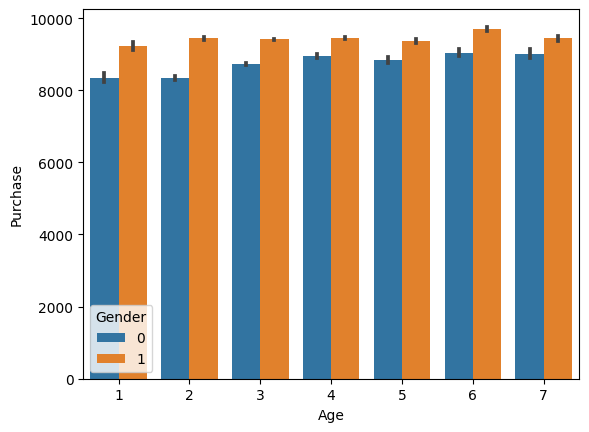

In [23]:
sns.barplot(x="Age",y="Purchase",hue="Gender",data = df_train)

## Observation:
> In all the strata of age, **males** are purchasing more than females

<a id="13"></a>
## Q. Which Product Category has generated most revenue out of "Product_Category_1","Product_Category_2" & "Product_Category_3" ?

In [24]:
# Know all products in "Product_Category_1"
sorted(df_train["Product_Category_1"].unique())
# 20 unique products

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [25]:
df_prd_cat_1 = df_train.groupby(["Product_Category_1","Purchase"]).size().reset_index()
df_prd_cat_1["Purchase"].sum()

364717330

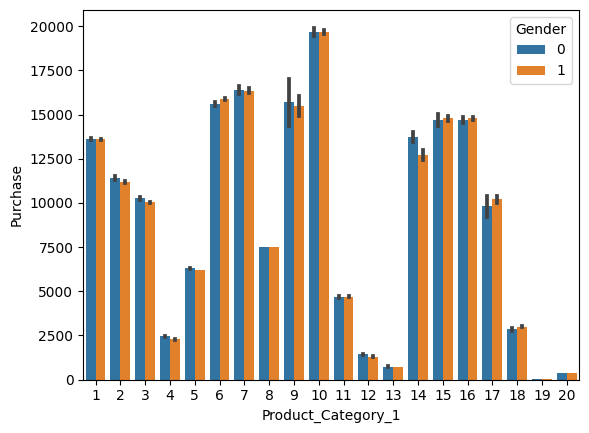

In [26]:
sns.barplot(x="Product_Category_1",y="Purchase",hue="Gender",data = df_train);

In [27]:
# Know all products in "Product_Category_2"
sorted(df_train["Product_Category_2"].unique())
# 17 unique products

[2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0]

In [28]:
df_prd_cat_2 = df_train.groupby(["Product_Category_2","Purchase"]).size().reset_index()
df_prd_cat_2["Purchase"].sum()

941707899

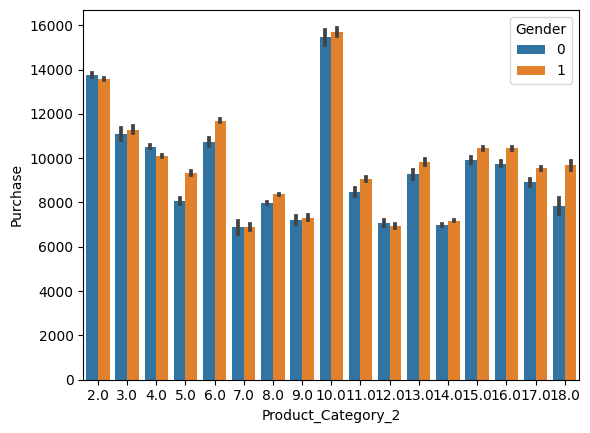

In [29]:
sns.barplot(x="Product_Category_2",y="Purchase",hue="Gender",data = df_train);

In [30]:
# Know all products in "Product_Category_3"
sorted(df_train["Product_Category_3"].unique())
# 16 unique products

[3.0,
 4.0,
 5.0,
 6.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0]

In [31]:
df_prd_cat_3 = df_train.groupby(["Product_Category_3","Purchase"]).size().reset_index()
df_prd_cat_3["Purchase"].sum()

811497520

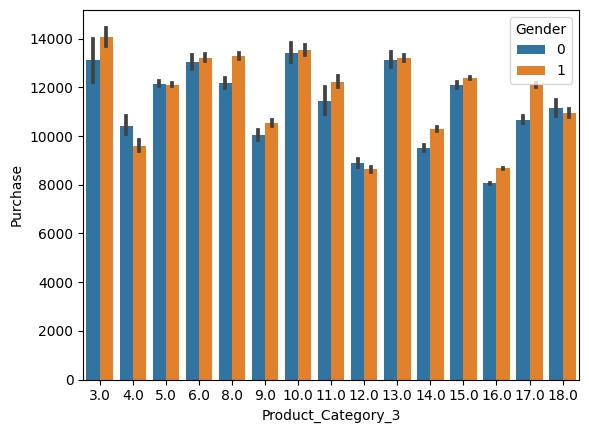

In [32]:
sns.barplot(x="Product_Category_3",y="Purchase",hue="Gender",data = df_train);

## Observation:
Revenue By "Product_Category_1" = $364717330$

Revenue By "Product_Category_2" = $941707899$

Revenue By "Product_Category_3" = $811497520$

> Most revenue is generated by **"Product_Category_2"**